In [1]:
import networkx as nx

In [2]:
G = nx.Graph() #define an object from the class of Graph
G.add_nodes_from([1, 2, 3, 4, 5]) #adding nodes into graph
G.add_edges_from([(1, 2), (2, 3), (3, 4), (5, 1), (1, 4), (2, 5)]) #adding edges between two nodes

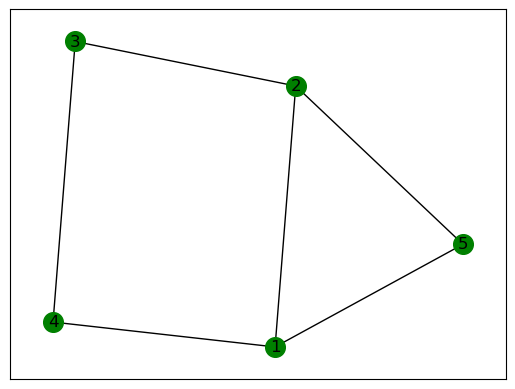

In [3]:
nx.draw_networkx(G, node_size=200, node_color='green')

In [4]:
G.nodes() #having a list of nodes

NodeView((1, 2, 3, 4, 5))

In [5]:
G.edges() #having a list of edges

EdgeView([(1, 2), (1, 5), (1, 4), (2, 3), (2, 5), (3, 4)])

In [6]:
G.number_of_nodes() # the number of nodes in the graph

5

In [7]:
G.number_of_edges() #number of edges in the graph

6

In [8]:
2 in G #verifying being a node in the graph

True

In [9]:
7 in G

False

In [10]:
#indicating nodes with their degrees and their neighbors as adgacency
for node in G.nodes():
    print(node, G.degree(node), G.adj[node])
    

1 3 {2: {}, 5: {}, 4: {}}
2 3 {1: {}, 3: {}, 5: {}}
3 2 {2: {}, 4: {}}
4 2 {3: {}, 1: {}}
5 2 {1: {}, 2: {}}


In [11]:
A = nx.adjacency_matrix(G) #a matrix of adjacency of the graph, 1 for having edge between two nodes and 0 for not edge
print(A.todense())

[[0 1 0 1 1]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [1 1 0 0 0]]


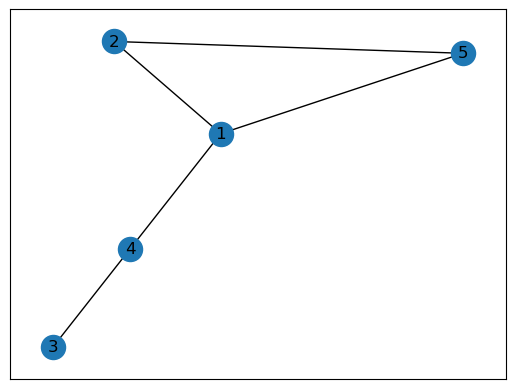

In [12]:
G.remove_edge(2, 3) # removing an edge from the graph
nx.draw_networkx(G)

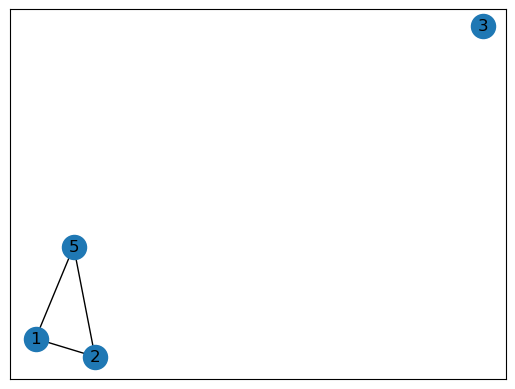

In [13]:
G.remove_node(4) # removing node from the graph
nx.draw_networkx(G)

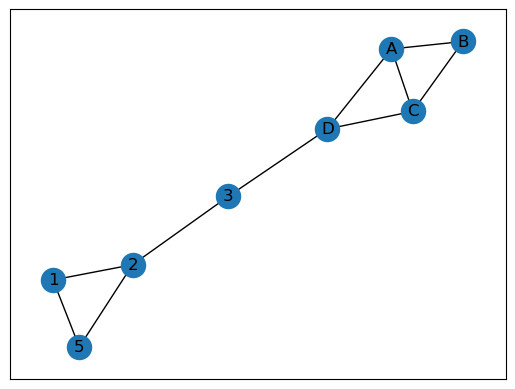

In [14]:
G.add_nodes_from('ABCD') #adding nodes as a list of a string
G.add_edges_from(['AB', 'AC', 'CB', 'AD', 'DC', (2, 3), (3, 'D')])
nx.draw_networkx(G)

In [15]:
# adding weight and attributes into graph through specifying the edge name and node name
G.edges[2, 3]['weight'] = 10
G.edges['AB']['weight'] = 12
G.add_node('A', weight=15)
G.add_node(1, time='5pm')

In [16]:
G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 5, {}), (2, 5, {}), (2, 3, {'weight': 10}), (3, 'D', {}), ('A', 'B', {'weight': 12}), ('A', 'C', {}), ('A', 'D', {}), ('B', 'C', {}), ('C', 'D', {})])

In [17]:
G.nodes(data=True)

NodeDataView({1: {'time': '5pm'}, 2: {}, 3: {}, 5: {}, 'A': {'weight': 15}, 'B': {}, 'C': {}, 'D': {}})

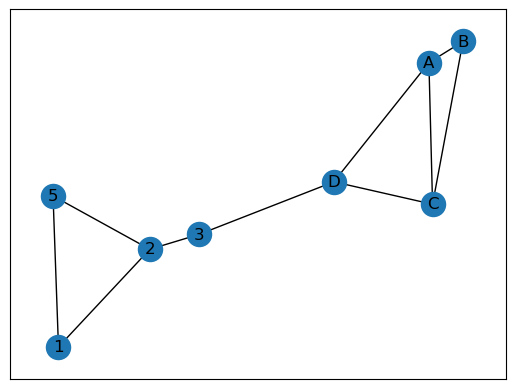

In [18]:
nx.draw_networkx(G)

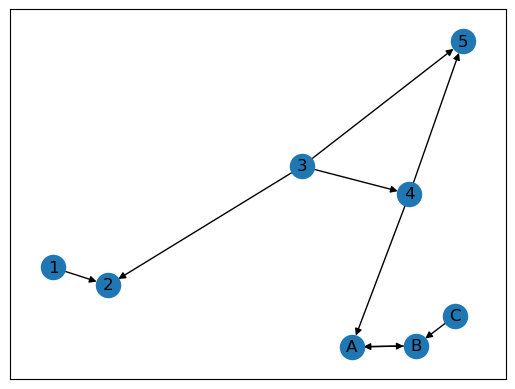

In [19]:
#a directed graph
DG = nx.DiGraph()
e = [(1, 2), (3, 2), (4, 5), (3, 4),(3,5), (4, 'A'), 'AB', 'BA', 'CB']
DG.add_edges_from(e)
nx.draw_networkx(DG)

In [20]:
DG.degree()

DiDegreeView({1: 1, 2: 2, 3: 3, 4: 3, 5: 2, 'A': 3, 'B': 3, 'C': 1})

In [22]:
nx.is_directed_acyclic_graph(DG)#tocheck there is no circle

False

In [23]:
#how many nodes is required to be removed for removing circles in the graph
nx.edge_connectivity(DG)

0

In [131]:
DG.remove_edge('A','B')#for having topological sort, we need not have any circle
list(nx.topological_sort(DG))#it is sorting the nodes based on what would be independent from others. now we can see 1 and 3 there is no dependency but for 2 we should meet 1 or 3. 

[1, 3, 'C', 2, 4, 'B', 5, 'A']

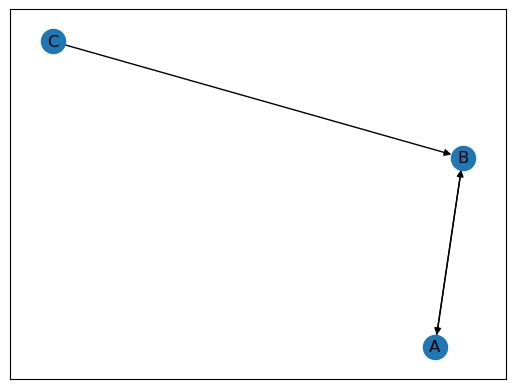

In [40]:
#extracting a subgraph from primary graph
s = DG.subgraph(['A', 'B', 'C'])
nx.draw_networkx(s)

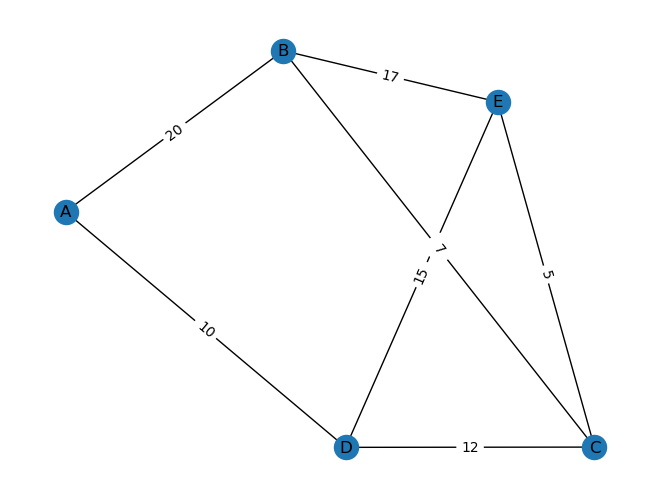

In [24]:
C = nx.Graph()
w = [('A','D',10), ('D','E',15), ('C','B',15), ('A','B', 20), ('E', 'C', 5), ('B', 'C', 7), ('D', 'C', 12), ('B', 'E', 17)]#nodes and edges plus to weights
l = {'AD':10, 'DE':15, 'CB':15, 'AB':20, 'EC':5, 'BC':7, 'DC':12, 'BE':17}#specifying weights to display on the graph
C.add_weighted_edges_from(w)
pos = nx.spring_layout(C)#appy all condition and layout on graph
nx.draw(C, pos, with_labels=True, label={n: n for n in C.nodes()})
nx.draw_networkx_edge_labels(C, pos, edge_labels=l);
        

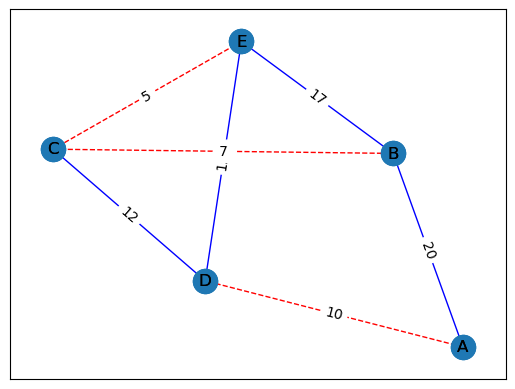

In [77]:
a = {(u, v) for (u, v, d) in C.edges(data=True) if d['weight']<=10}
b = {(u, v) for (u, v, d) in C.edges(data=True) if d['weight']>10}
edge_labels = {(u, v): d['weight'] for u, v, d in C.edges(data=True)}
nx.draw_networkx(C, pos, edgelist=a, style='dashed', edge_color='Red');#conditional display of edges for edges less than weight=10
nx.draw_networkx(C, pos, edgelist=b, edge_color='Blue');#conditional display of edges for edges bigger than weight=10
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels);#adding labels on edges

In [78]:
list(C.degree())#showing a list of tuples (node, degree)

[('A', 2), ('D', 3), ('E', 3), ('C', 3), ('B', 3)]

In [79]:
nx.degree_histogram(C) #([number of nodes with :degree=0, degree=1, degree=2, degree=3]

[0, 0, 1, 4]

In [81]:
nx.descendants(C, 'A')#children of node of A

{'B', 'C', 'D', 'E'}

In [83]:
nx.ancestors(C, 'A')#the parents of node of A which would be defferent fro children list in directed graph

{'B', 'C', 'D', 'E'}

In [138]:
nx.is_biconnected(C)#means that with removing an edge it will not be anymore a connected graph

True

In [142]:
list(nx.articulation_points(C))#the number of nodes causing a connected graph to be converted to separate graph

[]

In [143]:
list(nx.find_cliques(C))# each clique is a subgraph of primary graph which is a complete graph

[['A', 'B'], ['A', 'D'], ['C', 'E', 'D'], ['C', 'E', 'B']]

In [146]:
nx.graph_clique_number(C)

C:\Users\zmaso\AppData\Local\Temp\ipykernel_13364\748523736.py:1: DeprecationWarning: 

graph_clique_number is deprecated and will be removed.
Use: ``max(len(c) for c in nx.find_cliques(G))`` instead.
  nx.graph_clique_number(C)


3

In [148]:
nx.cliques_containing_node(C, 'A')

C:\Users\zmaso\AppData\Local\Temp\ipykernel_13364\153446287.py:1: DeprecationWarning: 

cliques_containing_node is deprecated and will be removed.
Use the result of find_cliques directly to compute maximal cliques
containing each node:

    {n: [c for c in nx.find_cliques(G) if n in c] for n in G}


  nx.cliques_containing_node(C, 'A')


[['A', 'B'], ['A', 'D']]

In [150]:
nx.minimum_edge_cut(C)#minimum weights for converting a connected graph to uncennected graph by removing the edges

{('A', 'B'), ('A', 'D')}

In [152]:
a, b = nx.stoer_wagner(C)
a, b #the cost of cutting edges by summing the cut edges' weights, which nodes have been cut

(24, (['C'], ['A', 'D', 'B', 'E']))

In [155]:
nx.shortest_path_length(C, 'A', 'C')

2

In [158]:
nx.dijkstra_path(C, 'A', 'C')#listing shortest path between  A and C

['A', 'D', 'C']

In [159]:
nx.dijkstra_path_length(C, 'A', 'C')#summation on weigths of length

22

In [160]:
nx.bellman_ford_path_length(C, 'A', 'C')#summation on weigths of length when there is negative weights

22

In [161]:
from networkx.algorithms import tree

In [164]:
list(tree.minimum_spanning_edges(C, algorithm='kruskal'))#minimum weights sumation and path to build a tree, like minimum lenght of wire to wiring whole spots in the town

[('E', 'C', {'weight': 5}),
 ('C', 'B', {'weight': 7}),
 ('A', 'D', {'weight': 10}),
 ('D', 'C', {'weight': 12})]

In [165]:
list(tree.minimum_spanning_edges(C, algorithm='prim'))

[('A', 'D', {'weight': 10}),
 ('D', 'C', {'weight': 12}),
 ('C', 'E', {'weight': 5}),
 ('C', 'B', {'weight': 7})]

In [167]:
nx.degree_centrality(C) # deg/n-1 actually /n-1 is kind of normalization in order to simplifying the comparison between two graphs

{'A': 0.5, 'D': 0.75, 'E': 0.75, 'C': 0.75, 'B': 0.75}

In [168]:
nx.betweenness_centrality(C)#for having the shortest path between two nodes howmany times we pass through a specific node.
#for example for going from A to B howmany times i should pass the point of D for having the shortest path

{'A': 0.05555555555555555,
 'D': 0.16666666666666666,
 'E': 0.05555555555555555,
 'C': 0.05555555555555555,
 'B': 0.16666666666666666}

In [171]:
nx.closeness_centrality(C)

{'A': 0.6666666666666666, 'D': 0.8, 'E': 0.8, 'C': 0.8, 'B': 0.8}

In [92]:
#having eulerian curcit which is a circle through whole graph by meeting all edge as on time meet.
nx.is_eulerian(C)

False

(True, [(0, 2), (2, 1), (1, 0)])

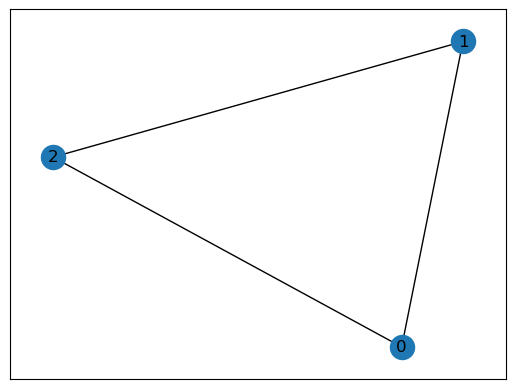

In [25]:
E = nx.complete_graph(3)
nx.draw_networkx(E)
nx.is_eulerian(E), list(nx.eulerian_circuit(E))

[(4, 5), (5, 6), (6, 7)]

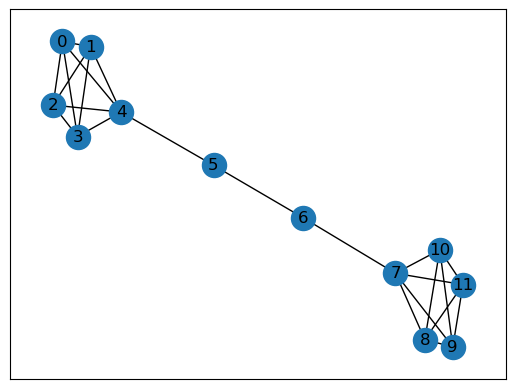

In [26]:
#bridge is the an edge which is connecting whole graph in one part. if we remove bridge from graph which lead to dividing the graph into two parts
D = nx.barbell_graph(5, 2)
nx.draw_networkx(D)
list(nx.bridges(D))#it would be empty for Graph C

In [27]:
#The eccentricity of a vertex is the greatest distance from the given vertex to any other vertex in the graph
for node in D.nodes():
    print(node, nx.eccentricity(D,node))

0 5
1 5
2 5
3 5
4 4
5 3
6 3
7 4
8 5
9 5
10 5
11 5


In [28]:
#The radius of the graph is the minimum eccentricity among all the vertices in the graph.
nx.radius(D)

3

In [29]:
#the maximum eccentricity of any vertex in the graph. 
nx.diameter(D)

5

In [30]:
nx.center(D)# the center of a graph is a set of vertices that have the minimum eccentricity. 

[5, 6]

In [31]:
#the periphery of a graph is the set of vertices that have the maximum eccentricity.
nx.periphery(D)

[0, 1, 2, 3, 8, 9, 10, 11]


$Breadth-First Search (BFS)$ is an algorithm for traversing or searching tree or graph data structures. It starts at a given node (often called the 'root' in trees) and explores all its neighboring nodes at the present depth prior to moving on to nodes at the next depth level. Here's a brief explanation:

Initialization: Begin at the root node (or any arbitrary node in the case of a graph) and enqueue it.
Exploration: Dequeue a node from the front of the queue and mark it as visited.
Neighbors: Enqueue all unvisited neighbors of the dequeued node.
Repetition: Repeat steps 2 and 3 until the queue is empty.
Characteristics:
Level-wise exploration: BFS explores nodes level by level. All nodes at depth 
𝑑
d are explored before moving on to nodes at depth 
𝑑
+
1
d+1.
Shortest Path: In an unweighted graph, BFS can be used to find the shortest path from the starting node to any other node, since it explores all nodes at the current depth before moving to deeper levels.
Queue: BFS uses a queue to keep track of nodes to be explored.
Example:
Consider a graph:

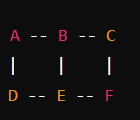

Starting BFS from node A:

Initialize: Queue = [A], Visited = {A}
Dequeue A, enqueue its neighbors B and D: Queue = [B, D], Visited = {A, B, D}

Dequeue B, enqueue its neighbors C and E: Queue = [D, C, E], Visited = {A, B, D, C, E}

Dequeue D, enqueue its neighbor E (already visited, so skip): Queue = [C, E], Visited = {A, B, D, C, E}

Dequeue C, enqueue its neighbor F: Queue = [E, F], Visited = {A, B, D, C, E, F}

Dequeue E, enqueue its neighbor F (already visited, so skip): Queue = [F], Visited = {A, B, D, C, E, F}

Dequeue F, no new neighbors to enqueue: Queue = [], Visited = {A, B, D, C, E, F}

The order of traversal would be: A, B, D, C, E, F.

BFS ensures all nodes at the same level of the graph are processed before moving to the next level, making it ideal for finding the shortest path in unweighted graphs.

In [32]:
#The breadth first tranvers as queue format from  node 1: first come first go. it travers through graph by meeting the nearest neighbor of a node
list(nx.bfs_tree(D, 1))

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

$Depth-First Search (DFS) $is a fundamental algorithm for exploring or searching through graph data structures, either in an undirected or directed graph. Here are the key points about DFS:

Starting Point: DFS begins at a specified starting node (vertex) and explores as far as possible along each branch before backtracking.

LIFO Structure: It uses a stack (Last-In-First-Out) data structure, either implicitly through recursion or explicitly with a stack, to keep track of the vertices to visit next.

Exploration Process:

Mark the starting node as visited.
Recursively or iteratively visit an unvisited adjacent node, marking it as visited and pushing it onto the stack.
If a node has no unvisited adjacent nodes, backtrack by popping nodes off the stack until a node with unvisited adjacent nodes is found.
Repeat the process until all reachable nodes from the starting node have been visited.
Path Finding: DFS can be used to find paths between nodes, detect cycles, and traverse all nodes in a graph.

Applications: DFS is useful for solving problems such as finding connected components, topological sorting (in directed acyclic graphs), and solving puzzles or games where all possible moves need to be explored (e.g., mazes).

Example:
Consider a simple graph:

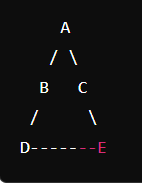

A DFS starting from node A might proceed as follows:

Start at A, mark A as visited.

Move to B, mark B as visited.

Move to D, mark D as visited.

From D, move to E, mark E as visited.

From E, backtrack to D (no more unvisited adjacent nodes).

Backtrack to B (no more unvisited adjacent nodes).

Backtrack to A, then move to C, mark C as visited.

From C, move to E, but E is already visited, so backtrack to C.

Backtrack to A (all nodes connected to A are now visited).

The DFS traversal order in this example might be: A, B, D, E, C.

In [33]:
#the depth first travers as a stack format : last come first go. 
#it travers through out graph by meeting children of children to meet the furthest node connected to first node
list(nx.dfs_tree(D, 1))

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

['A', 'D', 'B', 'E', 'C']


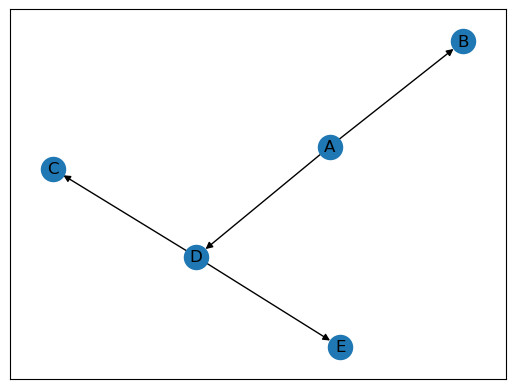

In [117]:
print(list(nx.bfs_tree(C, 'A')));
nx.draw_networkx(nx.bfs_tree(C, 'A'))

In [113]:
list(nx.dfs_tree(C, 'A'))

['A', 'D', 'E', 'C', 'B']

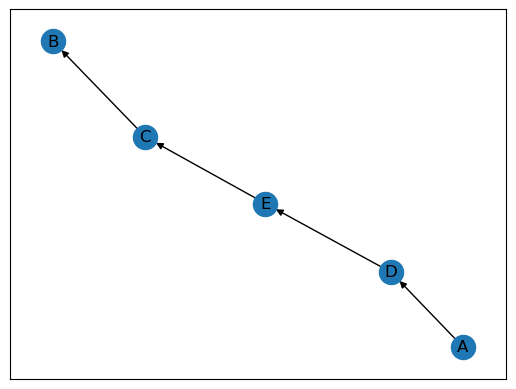

In [118]:
nx.draw_networkx(nx.dfs_tree(C, 'A'))

In [35]:
import networkx.algorithms.isomorphism as iso

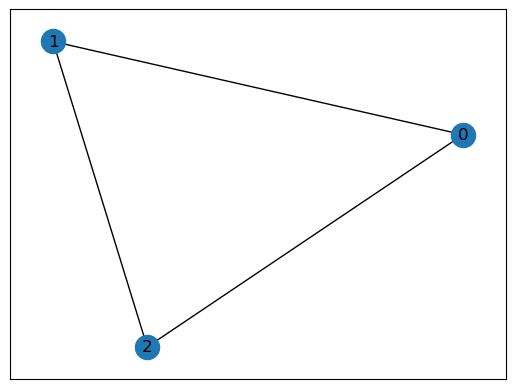

In [37]:
G1 = nx.cycle_graph(3)
nx.draw_networkx(G1)

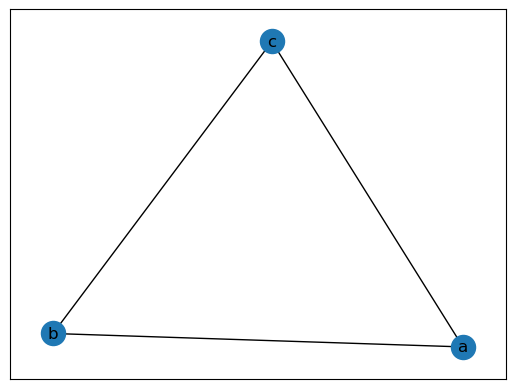

In [47]:
G2 = nx.Graph([('a', 'b'), ('b', 'c'), ('a', 'c')])
nx.draw_networkx(G2)

two graphs are said to be isomorphic if there is a one-to-one correspondence between their vertices and
edges that preserves the incidence relationship. In simpler terms, two graphs are isomorphic 
if they are structurally identical, even if their vertex labels are different.

In [48]:
nx.is_isomorphic(G1, G2)

True

In [49]:
from networkx.algorithms import bipartite

a bipartite graph is a graph whose vertices can be divided into two disjoint and independent sets 
𝑈
U and 
𝑉
V such that every edge connects a vertex in 
𝑈
U to a vertex in 
𝑉
V. In other words, there are no edges between vertices within the same set.

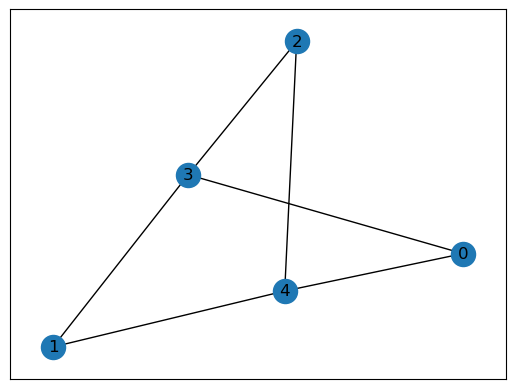

In [51]:
G1 = nx.complete_bipartite_graph(3, 2)# creating a graph one set including 3 nodes another set including 2 nodes which one set is {1, 2, 0} another disjoint set is {3, 4)
nx.draw_networkx(G1)

In [52]:
s1, s2 = bipartite.sets(G1)

In [53]:
s1

{0, 1, 2}

In [54]:
s2

{3, 4}

In [55]:
bipartite.is_bipartite(G1)

True

In [56]:
import pandas as pd

In [64]:
df = pd.read_csv('./f.csv')
df

,From,To
0,Ali,Mahdi
1,Sara,Fariba
2,Farshid,Tina
3,Omid,Sina
4,Ali,Reza
5,Ali,Davood
6,Sara,Javad
7,Sara,Karim
8,Farshid,Matin
9,Farshid,Rahim


In [67]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'From', 'To')#extracting a geraph through pandas columns

In [72]:
# print(nx.info(G))

In [74]:
import matplotlib.pyplot as plt

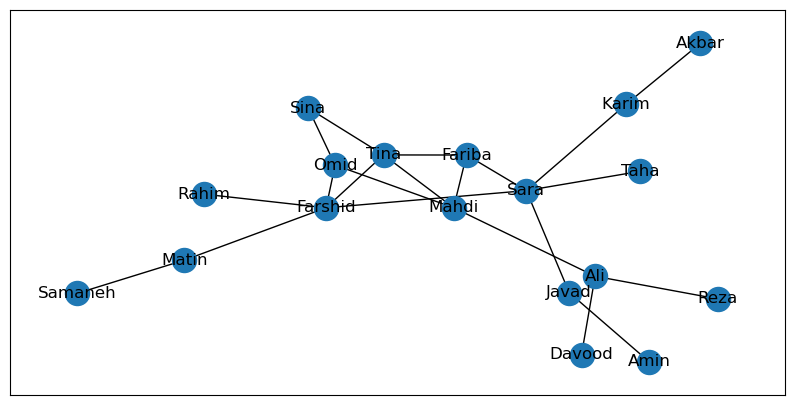

In [78]:
plt.figure(figsize=(10, 5))
nx.draw_networkx(G)
plt.show() #plotting graph by matplot to have a clear figure in comparison with draw_networkx

In [103]:
deg = dict(G.degree())#making dictinary from degree and nodes
nx.set_node_attributes(G, deg, 'degree') #assign degree to each node

C = dict(nx.degree_centrality(G))
nx.set_node_attributes(G, C, 'C')

BC = dict(nx.betweenness_centrality(G))
nx.set_node_attributes(G, BC, 'BC')

CC = dict(nx.closeness_centrality(G))
nx.set_node_attributes(G, CC, 'CC')

t = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient= 'index')#building a dataframe from all attributes assigned before to each node
t

,degree,BC,CC,C
Ali,3,0.227941,0.320755,0.176471
Mahdi,4,0.318627,0.414634,0.235294
Sara,5,0.514706,0.472222,0.294118
Fariba,3,0.213235,0.435897,0.176471
Farshid,5,0.421569,0.472222,0.294118
Tina,4,0.139706,0.425000,0.235294
Omid,3,0.102941,0.414634,0.176471
Sina,2,0.002451,0.314815,0.117647
Reza,1,0.000000,0.246377,0.058824
Davood,1,0.000000,0.246377,0.058824


In [106]:
t.sort_values('C', ascending=False)[:4]

,degree,BC,CC,C
Sara,5,0.514706,0.472222,0.294118
Farshid,5,0.421569,0.472222,0.294118
Tina,4,0.139706,0.425000,0.235294
Mahdi,4,0.318627,0.414634,0.235294


In [110]:
max(C.keys() ,key=lambda x:C[x]) #maximum value of centrality 

'Sara'

In [113]:
nx.shortest_path(G, 'Sara', 'Amin')

['Sara', 'Javad', 'Amin']